In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


# This notebook contains: 

1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

# 1. import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#Defining path
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [5]:
#double checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [6]:
van_listings_df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_van_listings.csv'), index_col = False)

In [7]:
neighbourhoods_df = pd.read_csv(os.path.join(path, 'Data', 'Original', 'neighbourhoods.csv'), index_col = False)

In [8]:
canada_geo = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver/Data/Original/custom.geo.json'


In [9]:
# Checking at the JSON file contents:

f = open(r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver/Data/Original/custom.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Costa Rica', 'sov_a3': 'CRI', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Costa Rica', 'adm0_a3': 'CRI', 'geou_dif': 0, 'geounit': 'Costa Rica', 'gu_a3': 'CRI', 'su_dif': 0, 'subunit': 'Costa Rica', 'su_a3': 'CRI', 'brk_diff': 0, 'name': 'Costa Rica', 'name_long': 'Costa Rica', 'brk_a3': 'CRI', 'brk_name': 'Costa Rica', 'brk_group': None, 'abbrev': 'C.R.', 'postal': 'CR', 'formal_en': 'Republic of Costa Rica', 'formal_fr': None, 'name_ciawf': 'Costa Rica', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Costa Rica', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 2, 'mapcolor9': 4, 'mapcolor13': 2, 'pop_est': 5047561, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 61801, 'gdp_year': 2019, 'economy': '5. Emerging region: G20', 'income_grp': '3. Upper middle income', 'fips_10': 'CS', 'iso_a2': 'CR', 'iso_a2_eh': 'CR', 'iso_a3': 'CRI', 'iso_a3

In [10]:
van_listings_df.head()

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,2,283,1.68,1,0,30,23-156488
1,1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,31,15,0.15,1,363,0,NaN
2,2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,1,493,3.00,1,0,55,22-311727
3,3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,30,101,0.66,1,92,5,NaN
4,4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,3,33,0.21,1,17,0,21-156500


In [11]:
van_listings_df.shape

(6691, 14)

In [12]:
neighbourhoods_df.head(25)

,neighbourhood_group,neighbourhood
0,NaN,Arbutus Ridge
1,NaN,Downtown
2,NaN,Downtown Eastside
3,NaN,Dunbar Southlands
4,NaN,Fairview
5,NaN,Grandview-Woodland
6,NaN,Hastings-Sunrise
7,NaN,Kensington-Cedar Cottage
8,NaN,Kerrisdale
9,NaN,Killarney


In [13]:
neighbourhoods_df.shape

(23, 2)

# 2. Data Wrangling and Cleaning

In [14]:
van_listings_df.columns

Index(['Unnamed: 0', 'id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [15]:
van_listings_df.dtypes

Unnamed: 0                          int64
id                                  int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [16]:
van_listings_df.isna().sum()

Unnamed: 0                           0
id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              840
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1139
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1886
dtype: int64

In [17]:
# Checking for dups
van_listings_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6686    False
6687    False
6688    False
6689    False
6690    False
Length: 6691, dtype: bool

In [18]:
van_listings_df['price'].fillna(van_listings_df['price'].median(), inplace=True)


In [19]:
van_listings_df.isnull().sum()

Unnamed: 0                           0
id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1139
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1886
dtype: int64

In [20]:
# Creating subset of variables
columns = ['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count' ]

In [21]:
# creating the subset
van_geo = van_listings_df[columns]

In [22]:
van_geo.shape

(6691, 9)

In [23]:
van_geo.head()

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,283,0,1
1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,15,363,1
2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,493,0,1
3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,101,92,1
4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,33,17,1


In [24]:
van_geo.tail()

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
6686,1043694259400656638,Downtown,49.275730,-123.115480,Entire home/apt,138.0,0,6,1
6687,1043785105970341901,Kensington-Cedar Cottage,49.245914,-123.085170,Entire home/apt,139.0,0,269,1
6688,1043860568247128725,Oakridge,49.227418,-123.136011,Entire home/apt,232.0,0,167,2
6689,1044526386585207604,Downtown,49.278704,-123.108883,Private room,75.0,0,248,2
6690,1044548067589994085,Downtown,49.278120,-123.108950,Private room,70.0,0,248,2


Checking for extreme values

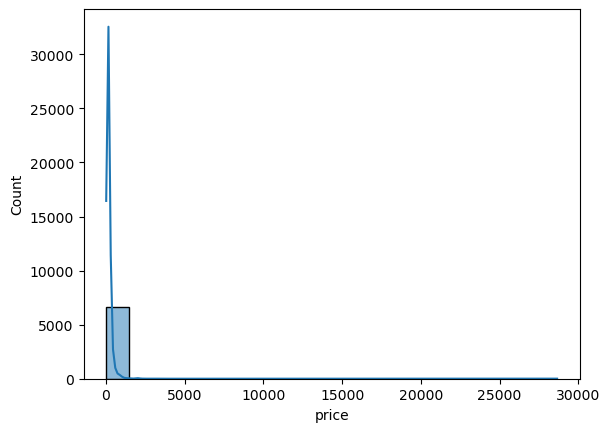

In [25]:
#Created a histogram to show extreme values for price
hist_price = sns.histplot(van_geo['price'], bins = 20, kde = True)


In [26]:
#Created a histogram to show extreme values for price
van_geo[van_geo['price']>3500]


,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
2608,48083270,Mount Pleasant,49.265730,-123.098550,Entire home/apt,8699.0,10,251,2
2748,50009999,West Point Grey,49.266410,-123.204010,Entire home/apt,8391.0,0,365,4
2786,50461998,West Point Grey,49.264310,-123.204440,Entire home/apt,11236.0,0,363,4
3500,631172552697440368,Downtown,49.277130,-123.128639,Entire home/apt,28650.0,5,364,3
3581,646480052557828957,West Point Grey,49.273120,-123.217730,Entire home/apt,20000.0,0,364,4
5479,926154788882848023,Downtown,49.287676,-123.120667,Entire home/apt,8194.0,0,362,4
5651,942883030713314417,Downtown,49.278441,-123.125255,Entire home/apt,3552.0,1,212,134


In [27]:
van_geo = van_geo[van_geo['price'] <= 3500] 

In [28]:
van_geo.shape

(6684, 9)

In [29]:
van_geo.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_van_geo.csv')) 

# 4. Plotting a choropleth

In [30]:
# Create a data frame with just the states and the values for rating we want plotted

price_to_plot = van_geo[['neighbourhood','price']]
price_to_plot.head(25)

,neighbourhood,price
0,Riley Park,150.0
1,Riley Park,120.0
2,Downtown,165.0
3,Kensington-Cedar Cottage,150.0
4,Kensington-Cedar Cottage,150.0
5,Hastings-Sunrise,800.0
6,Grandview-Woodland,100.0
7,Mount Pleasant,139.0
8,Kensington-Cedar Cottage,139.0
9,Mount Pleasant,51.0


In [31]:
price_to_plot

,neighbourhood,price
0,Riley Park,150.0
1,Riley Park,120.0
2,Downtown,165.0
3,Kensington-Cedar Cottage,150.0
4,Kensington-Cedar Cottage,150.0
...,...,...
6686,Downtown,138.0
6687,Kensington-Cedar Cottage,139.0
6688,Oakridge,232.0
6689,Downtown,75.0


In [32]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = canada_geo, 
    data = price_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Price per neighbourhood Vancouver").add_to(map)
folium.LayerControl().add_to(map)

map

In [33]:
# Save the map as an HTML file
map.save('price_neighbourhood_map.html')